In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import os
from pandas import Timestamp
from datetime import timedelta


In [2]:
home_dir = op.abspath('./')

data_files = glob.glob(op.join(home_dir,
                        'data',
                        '*.csv'))
sns.set_context('talk')

In [3]:
df_orig = pd.read_csv('pilot6_nonresp_inc_test_diff_stats.csv')
participant_set = set(df_orig['participant'])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/3744977092.py:1: DtypeWarning: Columns (195,196,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv('pilot6_nonresp_inc_test_diff_stats.csv')


In [4]:
df_orig['validity_binary']

0        1
1        1
2        1
3        1
4        1
        ..
31705   -1
31706    1
31707    1
31708   -1
31709    1
Name: validity_binary, Length: 31710, dtype: int64

In [5]:
df = []
for sub in data_files:
    try:
        sub_df = pd.read_csv(sub)
        
        # Filter for participants in participant_set
        if any(sub_df['participant'].isin(participant_set)):
            # Filter for non-empty 'image_recall_response.keys' and reset the index
            data = sub_df.loc[sub_df['image_recall_response.keys'].notna()].reset_index(drop=True)
            df.append(data.copy())
    except Exception as e:
        print(f"Error processing file {sub}: {e}")
        
# Concatenate all filtered data into a single DataFrame
df = pd.concat(df, ignore_index=True)

# Get the count of unique participants
unique_participants_count = len(set(df['participant']))
print(unique_participants_count)

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-09_12h13.56.688.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_22h11.53.949.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h01.07.543.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-04_02h15.32.256.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-21_13h00.30.594.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-29_23h04.21.655.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h47.14.580.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-18_09h47.19.365.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_13h46.08.948.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-14_15h57.31.348.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_10h00.52.918.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/150652_WM_Deepgen_2023-08-02_11h33.40.328.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psy

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-12_01h02.06.878.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-14_19h38.28.940.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_23h34.43.802.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-14_17h22.57.649.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-12_13h45.10.433.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_10h00.34.500.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-01_13h46.29.760.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-12_23h08.40.152.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/167176_WM_Deepgen_2024-12-02_13h24.03.783.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.28.226.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-21_21h45.14.516.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_18h27.14.124.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyEx

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-15_00h58.04.328.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-21_13h08.46.651.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-25_14h00.08.583.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_20h26.26.971.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h44.55.758.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/167176_WM_Deepgen_2024-12-02_13h24.34.452.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psyc

In [6]:
df_orig['Prioritized - Deprioritized IT Distractor Similarity'] 

0                  NaN
1                     
2        Least Similar
3        Least Similar
4                  NaN
             ...      
31705    Least Similar
31706              NaN
31707    Least Similar
31708                 
31709                 
Name: Prioritized - Deprioritized IT Distractor Similarity, Length: 31710, dtype: object

In [7]:
# df['it_sim_dis_unattend']

In [8]:
len(set(df['participant']))

104

In [9]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,ImagePath,key_resp_18.rt,key_resp_18.duration,end_exp.started,end_exp.stopped,key_resp_14.rt,key_resp_14.duration,key_resp_12.rt,key_resp_12.duration,trials_2.order
0,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/broccoli_01b.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/windowsill_07s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/bolo_tie_08s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/216_3.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,./stimuli/new_foil_stims/oilcan_08s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25348,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/141_2.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25349,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/new_foil_stims/speedboat_09s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25350,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/274_1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25351,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,./stimuli/new_foil_stims/mannequin_02s.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_orig

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,it_sim_dis_unattend_z,v2_sim_dis_unattend_z,it_sim_dis_test_z,v2_sim_dis_test_z,it_sim_dis_untest_z,v2_sim_dis_untest_z,it_sim_dis_attend_sq_z,it_sim_dis_unattend_sq_z,v2_sim_dis_attend_sq_z,v2_sim_dis_unattend_sq_z
0,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,0.765877,2.056332,-1.060809,-0.827625,0.754633,2.058248,-0.727631,0.302313,-0.742710,2.603009
1,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,0.580525,-1.478934,0.893102,0.990481,0.569626,-1.469677,0.526619,-0.012033,0.775040,-0.814401
2,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,1.161999,1.406098,-0.924022,-1.504105,1.150020,1.409365,-0.811746,1.133008,-0.787258,1.409026
3,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,1.098056,-1.002858,-1.295809,0.353425,1.086195,-0.994589,-0.522690,0.984261,0.011306,-0.793170
4,NaN,NaN,124081,2024-11-26 23:55:34.580,WM_Deepgen,2023.2.1,MacIntel,31.250000,NaN,NaN,...,0.270020,2.102144,-0.640534,0.302840,0.259697,2.103965,-0.903665,-0.432417,-0.038616,2.696740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31705,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,1.235474,-1.072369,1.251774,-1.029445,-1.183960,1.686397,-0.641012,1.310892,1.984597,-0.804788
31706,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,1.367795,1.051107,0.485915,-0.354428,1.355434,1.055111,-0.170380,1.650029,-0.543855,0.864735
31707,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,1.369389,-1.655195,-0.711614,0.535843,1.357025,-1.645572,-0.891060,1.654263,0.204434,-0.787605
31708,NaN,NaN,170536,2025-01-21 23:50:49.337,WM_Deepgen,2023.2.1,Win32,59.171598,NaN,NaN,...,-0.826799,-1.752868,-0.819920,-1.712002,0.077615,0.011304,-0.620471,-0.852526,-0.263425,-0.764692


In [11]:
# df_orig['image_recall_response_count']

In [12]:
combined_df = pd.concat([df, df_orig], ignore_index=True)


In [13]:
response_counts = combined_df.groupby('participant')['image_recall_response.keys'].count().reset_index()

response_counts = response_counts.rename(columns={'image_recall_response.keys': 'image_recall_response_count'})

print(response_counts)

     participant  image_recall_response_count
0         124081                          240
1         124180                          240
2         124750                          240
3         124819                          240
4         125722                          240
..           ...                          ...
101       169168                          240
102       169183                          240
103       169345                          240
104       169375                          236
105       170536                          238

[106 rows x 2 columns]


In [14]:
min_response_count = response_counts['image_recall_response_count'].min()
min_response_count

0

In [15]:
threshold = 250 * (2 / 3)

below_threshold_count = (response_counts['image_recall_response_count'] < threshold).sum()

print(f"The number of participants with image_recall_response.keys count below {threshold} is: {below_threshold_count}")

The number of participants with image_recall_response.keys count below 166.66666666666666 is: 2


In [16]:
combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1974338098.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)


In [17]:
# combined_df['acc_recall']

In [18]:
combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,
                                   np.where(combined_df['image_recall_response.keys'].isin([3, 4]), 1, np.nan))


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2647953418.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,


In [19]:
combined_df['mem_answ']

0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
57058    NaN
57059    NaN
57060    NaN
57061    NaN
57062    NaN
Name: mem_answ, Length: 57063, dtype: float64

In [20]:
combined_df['recall_answ'] = np.where(
    combined_df['mem_answ'].isna() | combined_df['acc_recall'].isna(), np.nan,
    np.where(
        (combined_df['mem_answ'] == 0) & (combined_df['acc_recall'] == 0) | 
        (combined_df['mem_answ'] == 1) & (combined_df['acc_recall'] == 1), 1, 0)
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1958824526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['recall_answ'] = np.where(


In [21]:
combined_df['recall_answ']

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
57058    NaN
57059    NaN
57060    NaN
57061    NaN
57062    NaN
Name: recall_answ, Length: 57063, dtype: float64

In [22]:
# count_gt_120 = combined_df[combined_df['image_recall_response.rt'] > 10].shape[0]
# count_gt_120

In [23]:
combined_df = combined_df[combined_df['image_recall_response.rt'] <= 4]


In [24]:
recall_count_per_participant = combined_df.groupby('participant')['recall_answ'].sum().reset_index()

recall_count_per_participant = recall_count_per_participant.rename(columns={'recall_answ': 'recall_answ_count'})

print(recall_count_per_participant)

     participant  recall_answ_count
0         124081              150.0
1         124180              123.0
2         124750              144.0
3         124819              170.0
4         125722              145.0
..           ...                ...
99        169168              158.0
100       169183              163.0
101       169345              154.0
102       169375              105.0
103       170536              123.0

[104 rows x 2 columns]


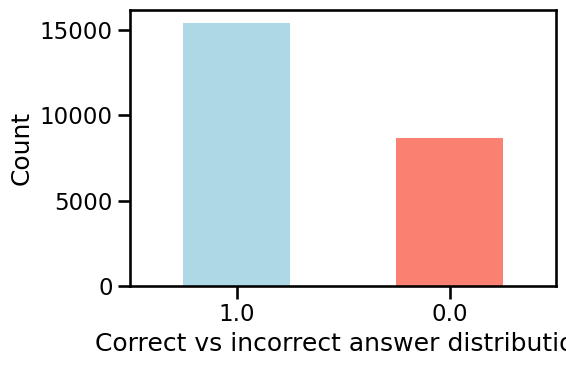

In [25]:
recall_counts = combined_df['recall_answ'].value_counts()

plt.figure(figsize=(6, 4))
recall_counts.plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Counts of Recall Ans = 1 vs 0')
plt.xlabel('Correct vs incorrect answer distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [26]:
answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
                  3: 'Probably seen', 4: 'Definitely seen'}

combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


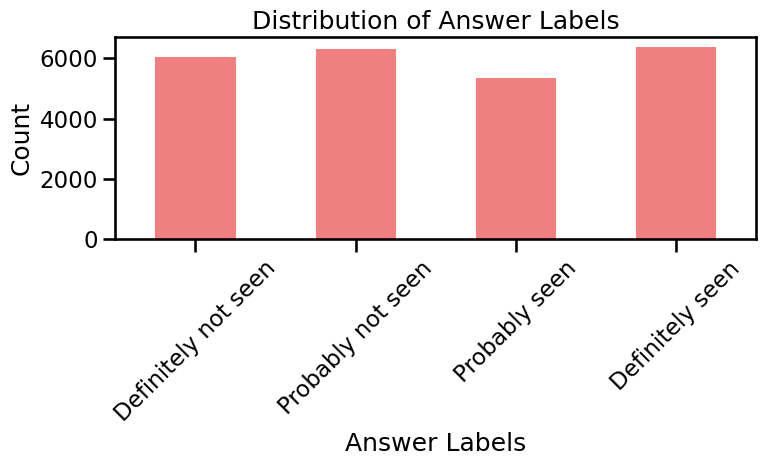

In [27]:
label_order = [
    'Definitely not seen', 
    'Probably not seen', 
    'Probably seen', 
    'Definitely seen'
]

# Count occurrences and sort by the defined order
answer_counts = combined_df['Answer Labels'].value_counts()
answer_counts = answer_counts.reindex(label_order)

plt.figure(figsize=(8, 5))
answer_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [28]:
df = combined_df

In [29]:
correctLTM_df = df[df['recall_answ'] == 1]

correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2467276519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


In [30]:
answer_counts_corr = correctLTM_df['Answer Labels'].value_counts()
answer_counts_corr = answer_counts_corr.reindex(label_order)

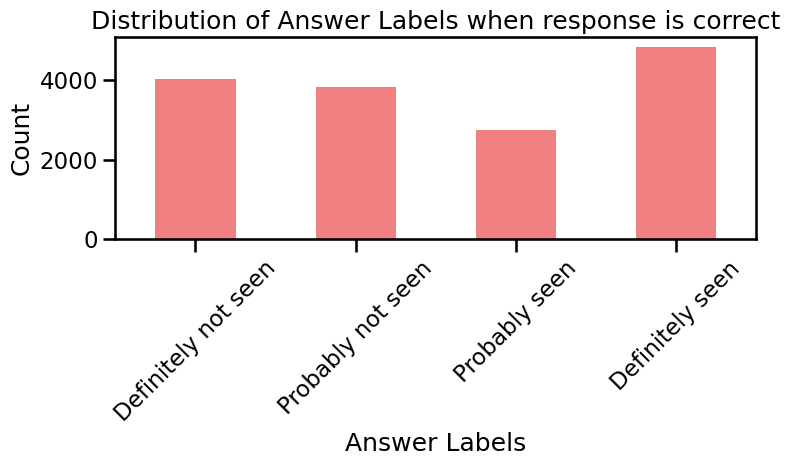

In [31]:
plt.figure(figsize=(8, 5))
answer_counts_corr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is correct')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [32]:
correctLTM_df['Answer Labels']

1        Definitely not seen
2          Probably not seen
3            Definitely seen
5          Probably not seen
6            Definitely seen
                ...         
25343    Definitely not seen
25344    Definitely not seen
25347          Probably seen
25348          Probably seen
25352        Definitely seen
Name: Answer Labels, Length: 15381, dtype: object

In [33]:
wrongLTM_df = df[df['recall_answ'] == 0]

wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1338151430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrongLTM_df['Answer Labels'] = wrongLTM_df['image_recall_response.keys'].map(answer_mapping)


In [34]:
answer_counts_incorr = wrongLTM_df['Answer Labels'].value_counts()
answer_counts_incorr = answer_counts_incorr.reindex(label_order)

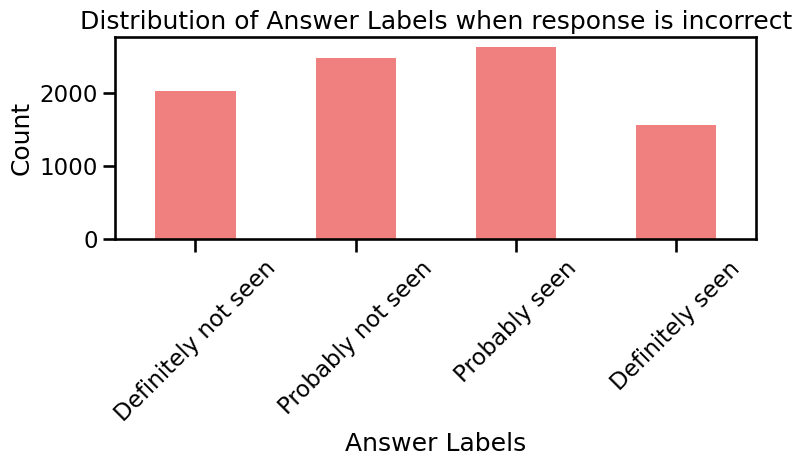

In [35]:
plt.figure(figsize=(8, 5))
answer_counts_incorr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is incorrect')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()



###for each of the categories plot the accuracy

In [36]:
# df = df[df['image_recall_response.rt'] <= 4]


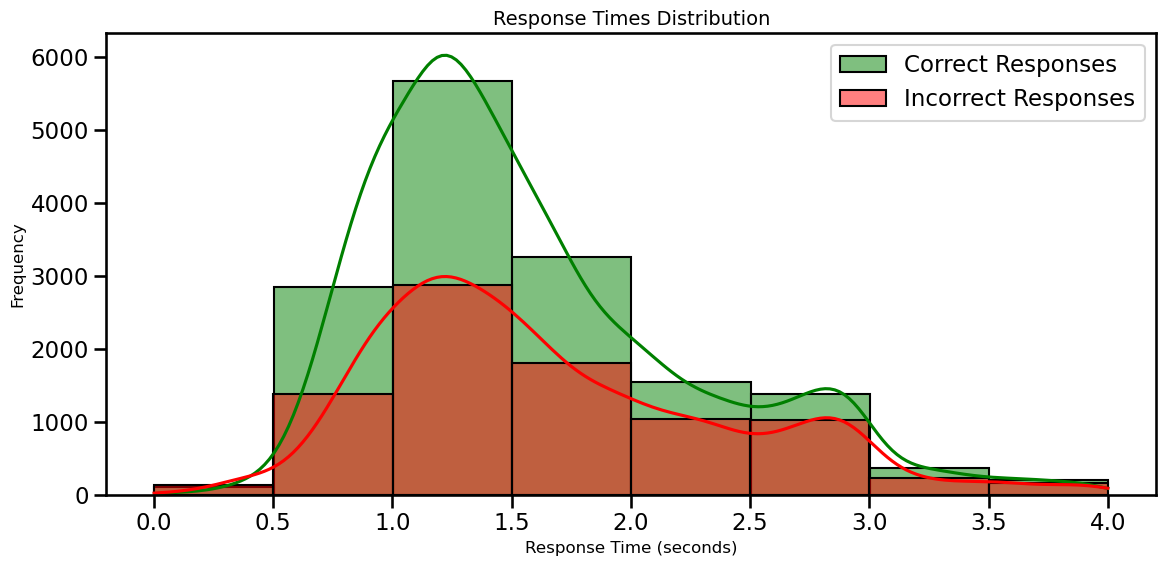

count    24058.000000
mean         1.609343
std          0.706502
min          0.000500
25%          1.097900
50%          1.431000
75%          1.992300
max          3.999800
Name: image_recall_response.rt, dtype: float64


In [37]:
df['recall_category'] = df['image_recall_response.keys'].map({
    1: 'Definitely not seen',
    2: 'Probably not seen',
    3: 'Probably seen',
    4: 'Definitely seen'
})

df['correct_recall'] = ((df['acc_recall'] == 1) & 
                              (df['Answer Labels'].isin(['Probably seen', 'Definitely seen']))) | \
                             ((df['acc_recall'] == 0) & 
                              (df['Answer Labels'].isin(['Definitely not seen', 'Probably not seen'])))



response_time_column = 'image_recall_response.rt'
correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# Get summary statistics for response times
response_time_stats = df[response_time_column].describe()

# Plotting the response times distribution
plt.figure(figsize=(12, 6))
sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

plt.title('Response Times Distribution', fontsize=14)
plt.xlabel('Response Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying summary statistics for response times
print(response_time_stats)


#####more fine graned bins

In [38]:
df['correct_recall']

1         True
2         True
3         True
4        False
5         True
         ...  
25345    False
25346    False
25347     True
25348     True
25352     True
Name: correct_recall, Length: 24058, dtype: bool

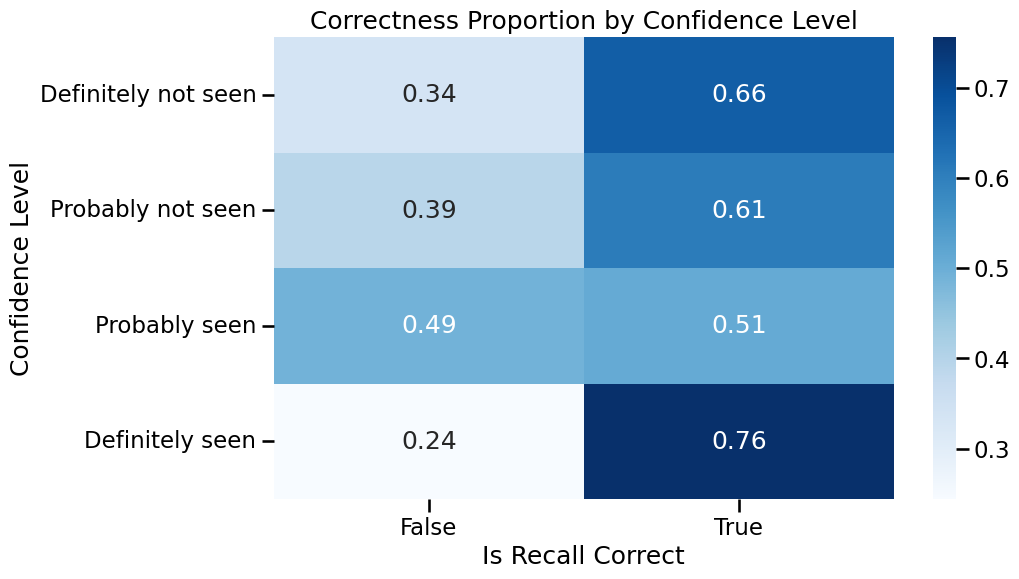

In [39]:
confidence_order = ['Definitely not seen', 'Probably not seen', 'Probably seen', 'Definitely seen']

confidence_mapping = {1: 'Definitely not seen', 2: 'Probably not seen', 
                                  3: 'Probably seen', 4: 'Definitely seen'}
df['confidence_level'] = df['image_recall_response.keys'].map(confidence_mapping)

confidence_correctness = pd.crosstab(df['confidence_level'], df['correct_recall'], normalize='index').reindex(index=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness, annot=True, cmap='Blues')
plt.title('Correctness Proportion by Confidence Level')
plt.xlabel('Is Recall Correct')
plt.ylabel('Confidence Level')
plt.show()


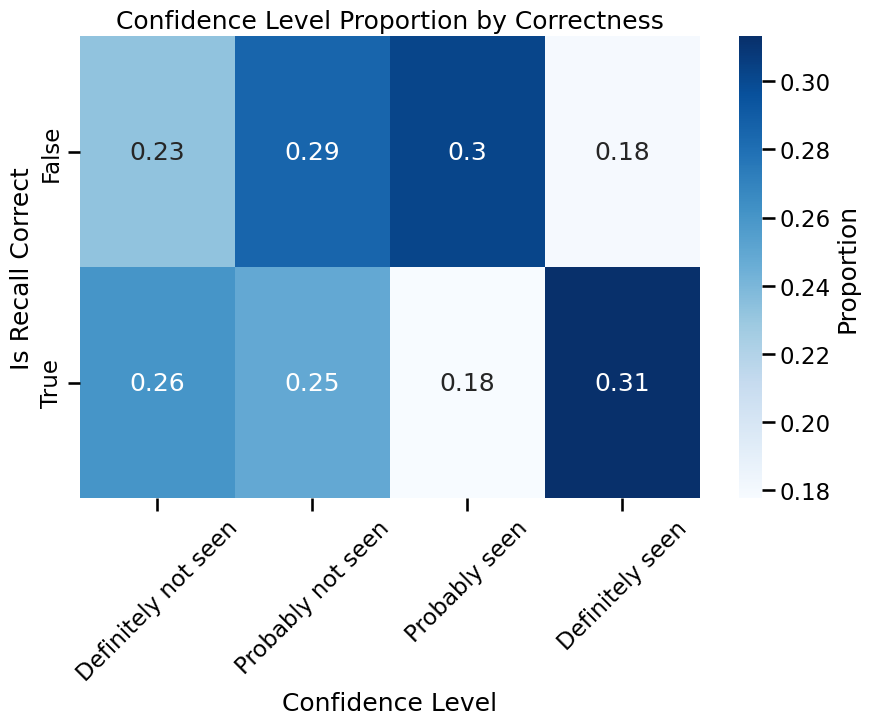

In [40]:
correctness_order = [False, True]  # Assuming 0 is 'not correct' and 1 is 'correct'

confidence_correctness_reversed = pd.crosstab(
    df['correct_recall'],
    df['confidence_level'],
    normalize='index'
).reindex(index=correctness_order, columns=confidence_order)

plt.figure(figsize=(10, 6))
sns.heatmap(confidence_correctness_reversed, annot=True, cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Confidence Level Proportion by Correctness')
plt.xlabel('Confidence Level')
plt.ylabel('Is Recall Correct')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

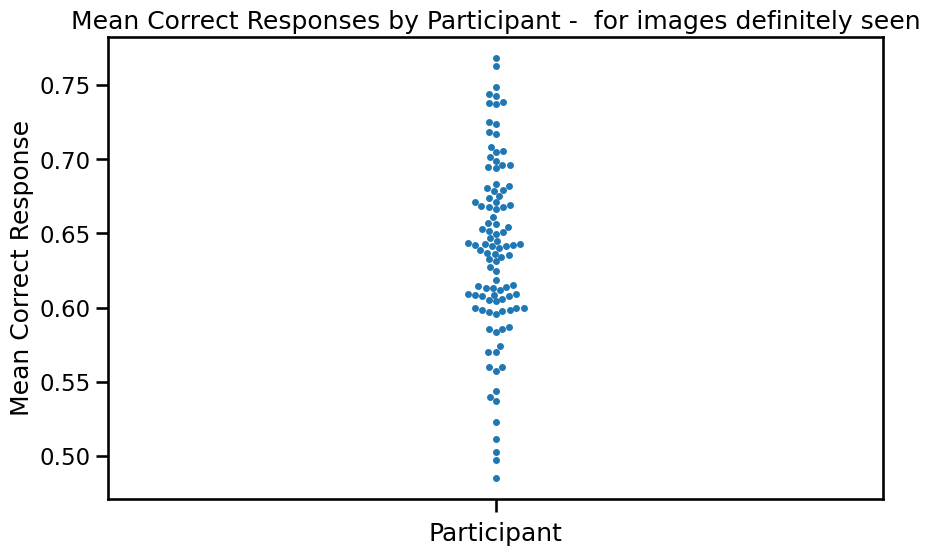

In [41]:
# Convert 'resp_correct' to numeric, coercing errors to NaN (non-numeric to NaN)
df['recall_answ'] = pd.to_numeric(df['recall_answ'], errors='coerce')

# Now, calculate the mean 'resp_correct' for each participant
mean_resp_correct = df.groupby('participant')['recall_answ'].mean().reset_index()

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.swarmplot(y='recall_answ', data=mean_resp_correct)

plt.title('Mean Correct Responses by Participant -  for images definitely seen')
plt.xlabel('Participant')
plt.ylabel('Mean Correct Response')

# Show the plot
plt.show()

In [42]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,it_sim_dis_unattend_sq_z,v2_sim_dis_attend_sq_z,v2_sim_dis_unattend_sq_z,acc_recall,mem_answ,recall_answ,Answer Labels,recall_category,correct_recall,confidence_level
1,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Definitely not seen,Definitely not seen,True,Definitely not seen
2,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Probably not seen,Probably not seen,True,Probably not seen
3,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Definitely seen,Definitely seen,True,Definitely seen
4,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
5,NaN,NaN,165862,2024-11-27_10h29.27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,NaN,NaN,NaN,0,0.0,1.0,Probably not seen,Probably not seen,True,Probably not seen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25345,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Definitely seen,Definitely seen,False,Definitely seen
25346,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,0,1.0,0.0,Probably seen,Probably seen,False,Probably seen
25347,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen
25348,NaN,NaN,167431,2024-11-24_14h54.08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,NaN,NaN,NaN,1,1.0,1.0,Probably seen,Probably seen,True,Probably seen


In [43]:
##acc_recall is 1 if the image was actually seen
##mem_answ is 1 if the said seen or probably seen
###recall_answ is 1 if these two are both 1 or both 0


### now I want, for the images where acc_recall == 1 to assign it, v2, etc
cols_to_copy = ['attend', 'reliability', 'validity', 'test_item']

# # Define the condition to match both `participant` and `ImagePath`
# condition = (df['acc_recall'] == 1) & (
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img1'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['img2'])) |
#     ((df['participant'] == df_orig['participant']) & (df['ImagePath'] == df_orig['ping_im']))
# )

# # Apply the condition and copy values from `df_orig` to `df`
# df.loc[condition, cols_to_copy] = df_orig.loc[
#     ((df_orig['participant'] == df['participant']) & (df_orig['img1'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['img2'] == df['ImagePath'])) |
#     ((df_orig['participant'] == df['participant']) & (df_orig['ping_im'] == df['ImagePath'])),
#     cols_to_copy
# ].values

In [44]:
df['participant']

1        165862
2        165862
3        165862
4        165862
5        165862
          ...  
25345    167431
25346    167431
25347    167431
25348    167431
25352    167431
Name: participant, Length: 24058, dtype: int64

In [45]:
df_orig['it_sim_dis_unattend']

0        0.308864
1        0.234115
2        0.468612
3        0.442825
4        0.108894
           ...   
31705    0.498244
31706    0.551606
31707    0.552249
31708   -0.333432
31709   -0.118393
Name: it_sim_dis_unattend, Length: 31710, dtype: float64

In [46]:
prc = []
for a in df['acc_recall']:
    if a == 1:
        prc.append('Correct')
    else:
        prc.append('Wrong')
df['Past Response Correctness'] = prc


In [47]:
df_orig['validity_binary']

0        1
1        1
2        1
3        1
4        1
        ..
31705   -1
31706    1
31707    1
31708   -1
31709    1
Name: validity_binary, Length: 31710, dtype: int64

In [48]:
def fill_non_nan_columns(row):
    # Locate matching rows in df_orig based on participant and image conditions
    matching_rows = df_orig[
        (df_orig['participant'] == row['participant']) &
        ((df_orig['img1'] == row['ImagePath']) | 
         (df_orig['img2'] == row['ImagePath']) | 
         (df_orig['ping_img'] == row['ImagePath']))
    ]
    
    # Copy non-NaN columns from the first matching row in df_orig if there's a match
    if not matching_rows.empty:
        match = matching_rows.iloc[0]
        for col in match.index:
            # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
            if col not in ['participant'] and pd.notna(match[col]):
                row[col] = match[col]
    return row

# Apply the function to each row in df, only where 'acc_recall' == 1
df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [49]:
# # Initialize an empty dataframe for df_ltm
# df_ltm = pd.DataFrame()

# def fill_non_nan_columns(row):
#     global df_ltm  # Use the global variable df_ltm
    
#     # Locate matching rows in df_orig based on participant and image conditions
#     matching_rows = df_orig[
#         (df_orig['participant'] == row['participant']) &
#         ((df_orig['img1'] == row['ImagePath']) | 
#          (df_orig['img2'] == row['ImagePath']) | 
#          (df_orig['ping_img'] == row['ImagePath']))
#     ]
    
# #     # Copy non-NaN columns from the first matching row in df_orig if there's a match
#     if not matching_rows.empty:
#         match = matching_rows.iloc[0]
# #         for col in match.index:
# #             # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
# #             if col not in ['participant'] and pd.notna(match[col]):
# #                 row[col] = match[col]
        
#         # Add the matching row to df_ltm and create an additional column
#         matching_row = match.copy()
#         matching_row['image_recall_response.keys'] = row['image_recall_response.keys']  # Replace 'some_value' with the desired logic
#         matching_row['acc_recall'] = row['acc_recall']  # Replace 'some_value' with the desired logic
#         matching_row['recall_answ'] = row['recall_answ']  # Replace 'some_value' with the desired logic
#         matching_row['mem_answ'] = row['mem_answ']  # Replace 'some_value' with the desired logic
#         matching_row['Answer Labels'] = row['Answer Labels']  # Replace 'some_value' with the desired logic
#         df_ltm = pd.concat([df_ltm, matching_row.to_frame().T], ignore_index=True)
#     'Answer Labels'
#     return row

# # Apply the function to each row in df, only where 'acc_recall' == 1
# df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [50]:
# df_ltm.to_csv("df_ltm.csv", index=False)


In [51]:
df['validity_binary']

1        NaN
2        NaN
3        1.0
4        NaN
5        NaN
        ... 
25345    NaN
25346    NaN
25347    1.0
25348   -1.0
25352   -1.0
Name: validity_binary, Length: 24058, dtype: float64

In [52]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [53]:
df = remove_unit_variance(df,'mouse.time_last','participant')
df['analysis_rt'] = df['mouse.time_last_within']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/3213010459.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['analysis_rt'] = df['mouse.time_last_within']


In [54]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [55]:
df['Distractor V2 Similarity Preference'] = df['v2_prefers'] 
df['Distractor IT Similarity Preference'] = df['it_prefers']

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2688763724.py:18: PerformanceWarning: DataF

In [56]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1072664152.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['tested_item'] = df['Tested Item']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1072664152.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ret_rel'] = df['Retrocue Reliability']


In [57]:
df_correct = df[df['resp_correct'] == 1]


In [58]:
df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - np.mean(df['it_sim_dis_diff'])
df['v2_sim_dis_diff'] = df['v2_sim_dis_diff'] - np.mean(df['v2_sim_dis_diff'])

df['it_sim_dis_diff_test'] = df['it_sim_dis_diff_test'] - np.mean(df['it_sim_dis_diff_test'])
df['v2_sim_dis_diff_test'] = df['v2_sim_dis_diff_test'] - np.mean(df['v2_sim_dis_diff_test'])

df['it_sim_dis_diff_test_sq'] = [x**2 for x in df['it_sim_dis_diff_test']]
df['v2_sim_dis_diff_test_sq'] = [x**2 for x in df['v2_sim_dis_diff_test']]

df['it_sim_dis_diff_sq'] = [x**2 for x in df['it_sim_dis_diff']]
df['v2_sim_dis_diff_sq'] = [x**2 for x in df['v2_sim_dis_diff']]


df['it_sim_dis_diff_sq'] = df['it_sim_dis_diff_sq'] - np.mean(df['it_sim_dis_diff_sq'])
df['v2_sim_dis_diff_sq'] = df['v2_sim_dis_diff_sq'] - np.mean(df['v2_sim_dis_diff_sq'])

df['it_sim_dis_diff_test_sq'] = df['it_sim_dis_diff_test_sq'] - np.mean(df['it_sim_dis_diff_test_sq'])
df['v2_sim_dis_diff_test_sq'] = df['v2_sim_dis_diff_test_sq'] - np.mean(df['v2_sim_dis_diff_test_sq'])


df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')


df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

In [59]:
# df['Answer Labels']

In [60]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1754000722.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(681.5937500000001, 0.5, 'Accuracy')

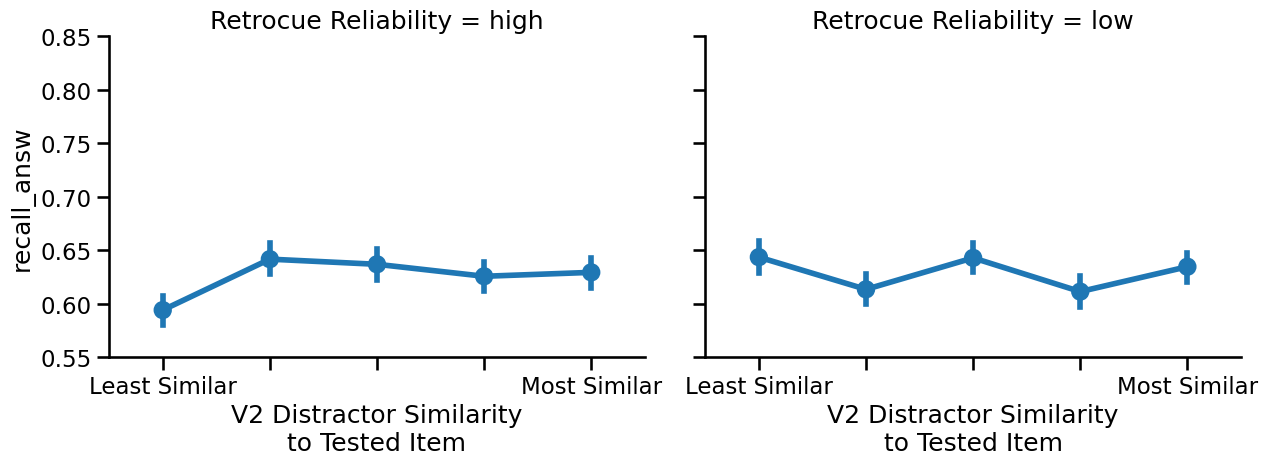

In [61]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = 'recall_answ',
            ci = 68,
#             hue = 'Tested Item',
            col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/448617506.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

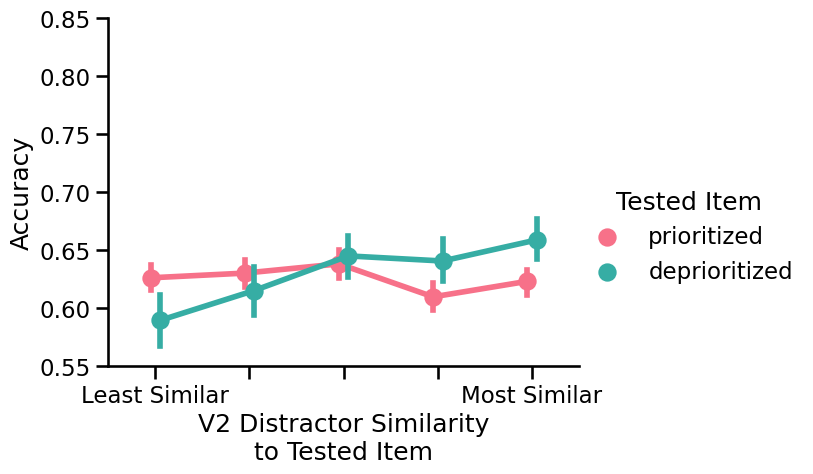

In [62]:
g = sns.catplot(
            x = 'V2 Distractor Similarity\nto Tested Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1195641324.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(96.08554487179485, 0.5, 'Accuracy')

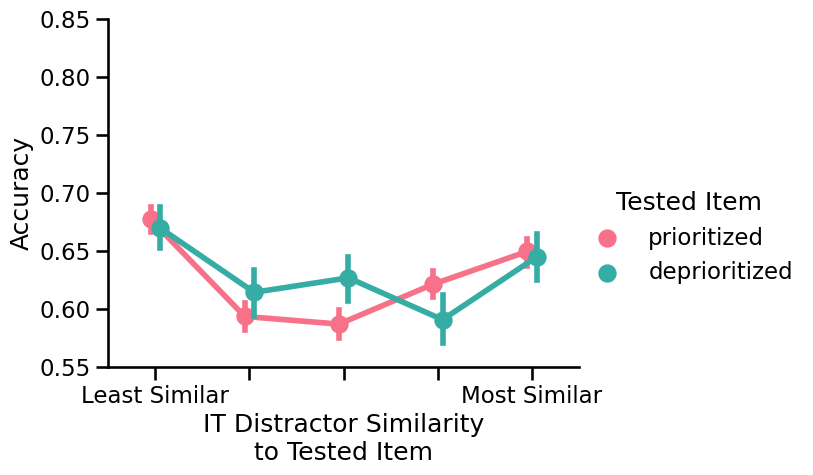

In [63]:
g = sns.catplot(
            x = 'IT Distractor Similarity\nto Tested Item',
            y = 'recall_answ',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.1,
            kind = 'point',
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.ylabel('Accuracy')


In [64]:
### When the seen image was validly tested

In [65]:
# Add a new column 'category' to df with all conditions
df['category'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else ('foil' if 'foil' in str(row['ImagePath']).lower()
          else ('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [66]:
df['mem_stim_type'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else  (('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


In [67]:
df['attend']

1         NaN
2         NaN
3        img1
4         NaN
5         NaN
         ... 
25345     NaN
25346     NaN
25347    img2
25348    img2
25352    img2
Name: attend, Length: 24058, dtype: object

In [68]:
df['Attend'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else 'foil' if (row['category']== 'foil')
    else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
    else 'not attended',
    axis=1
)

In [69]:
df['Attend']

1                foil
2                foil
3        not attended
4                foil
5                foil
             ...     
25345            foil
25346            foil
25347      distractor
25348    not attended
25352    not attended
Name: Attend, Length: 24058, dtype: object

In [70]:
# df['Attend Inc'] = df.apply(
#     lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
#     else 'foil' if (row['category']== 'not attended')
#     else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
#                              (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
#     else 'not attended',
#     axis=1
# )

In [71]:
unique_values = df['Attend'].unique()
unique_values

array(['foil', 'not attended', 'distractor', 'attended'], dtype=object)

In [72]:
def calculate_ltm_reliability(row):
    if (row['category']== 'foil'):
        return 'foil'
    elif row['reliability'] > 0.7:
        return 'high'
    elif row['reliability'] < 0.7:
        return 'low'
    
    else:
        return None  # Optional: Default case, if needed

# Apply the function to the dataframe
df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


In [73]:
df['Reliability']

1        foil
2        foil
3        high
4        foil
5        foil
         ... 
25345    foil
25346    foil
25347     low
25348    high
25352    high
Name: Reliability, Length: 24058, dtype: object

In [74]:
unique_values = df['Reliability'].unique()
print(unique_values)


['foil' 'high' 'low' None]


In [75]:
df_correct_wm = df[
    ((df['resp_correct'] == 1))
]

# df_correct_wm = df[
#     ((df['resp_correct'] == 1) | (df['category'] == 'foil') | (df['category'] == 'distractor'))
# ]

df_incorrect_wm = df[
    ((df['resp_correct'] == 0))
]


In [76]:
df_incorrect_wm


,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges,Prioritized - Deprioritized IT Distractor Similarity Squared Ranges,Tested - Untested V2 Distractor Similarity Ranges,Tested - Untested IT Distractor Similarity Ranges,Tested - Untested V2 Distractor Similarity Squared Ranges,Tested - Untested IT Distractor Similarity Squared Ranges,category,mem_stim_type,Attend,Reliability
14,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.01, -0.0079]","(-0.31, -0.0014]","(-0.04, 0.034]","(-0.74, -0.25]","(-0.01, -0.008]","(-0.33, -0.025]",distractor,distractor,distractor,high
16,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.01, -0.0079]","(-0.5, -0.31]","(-0.04, 0.034]","(-0.74, -0.25]","(-0.01, -0.008]","(-0.51, -0.33]",tested,tested,attended,high
29,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.56, -0.5]","(0.034, 0.098]","(-0.25, 0.25]","(-0.0046, 0.0005]","(-0.56, -0.51]",tested,tested,attended,high
31,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(-0.31, -0.0014]","(0.034, 0.098]","(0.25, 0.74]","(-0.008, -0.0046]","(-0.33, -0.025]",distractor,distractor,distractor,low
32,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.00043, 0.0074]","(-0.31, -0.0014]","(-0.16, -0.1]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25309,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.01, -0.0079]","(-0.5, -0.31]","(-0.04, 0.034]","(0.25, 0.74]","(-0.01, -0.008]","(-0.51, -0.33]",tested,tested,not attended,low
25329,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.56, -0.5]","(-0.1, -0.04]","(-0.25, 0.25]","(-0.0046, 0.0005]","(-0.56, -0.51]",distractor,distractor,distractor,high
25336,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(-0.5, -0.31]","(0.098, 0.17]","(0.25, 0.74]","(0.0074, 0.021]","(-0.51, -0.33]",distractor,distractor,distractor,low
25341,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.00043, 0.0074]","(-0.5, -0.31]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.51, -0.33]",distractor,distractor,distractor,low


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/780466382.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


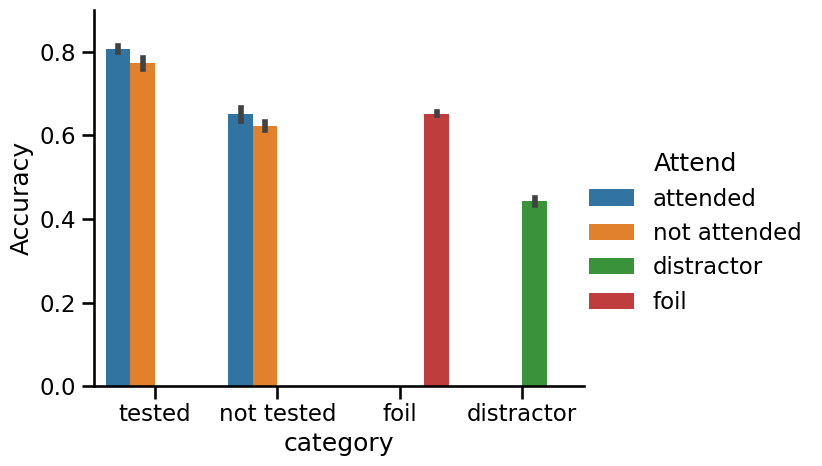

In [77]:
# df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
    aspect=1.3,
#     dodge=0.1,
    kind='bar',
#     palette=palette,  # Reverse the color order
    data=df,
    order=['tested', 'not tested', 'foil', 'distractor'],  # Ensure correct x-axis order
    hue_order=['attended', 'not attended', 'distractor', 'foil']  # Prioritize Tested Item categories
)
g.set_ylabels('Accuracy')

# Set y-axis limits
g.set(ylim=(0, 0.9))

# Set y-axis label
g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/757550791.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


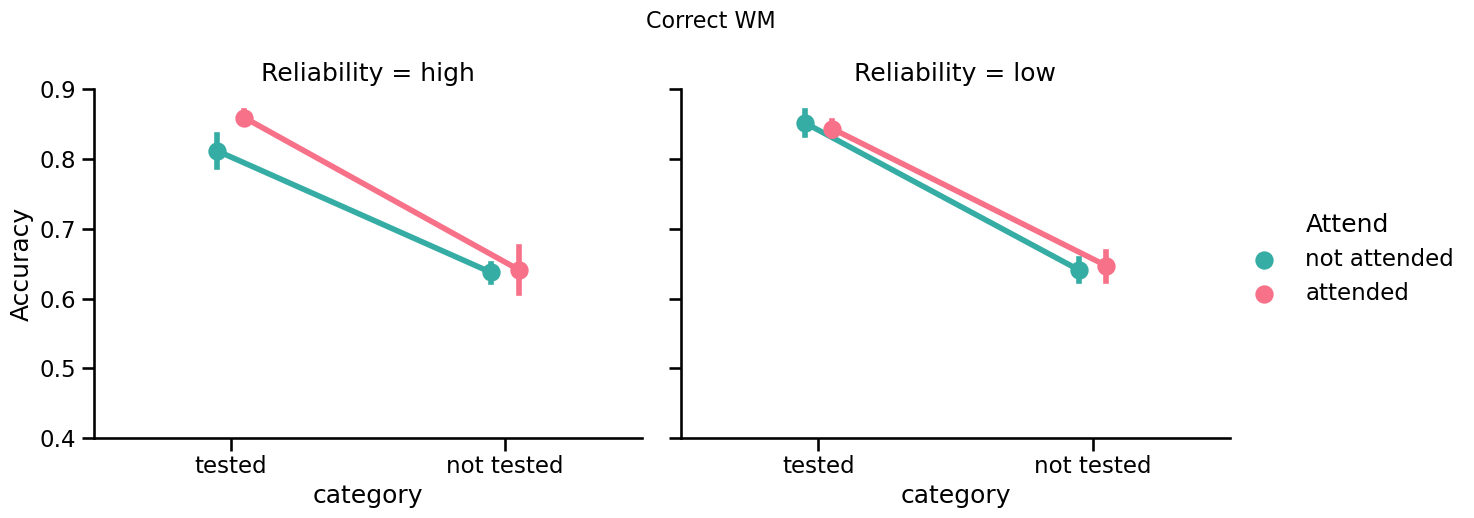

In [78]:
df_filtered_correct_wm = df_correct_wm[df_correct_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_filtered_correct_wm,
    order=['tested', 'not tested'],  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)
g.set_ylabels('Accuracy')

# Set y-axis limits
g.set(ylim=(0.4, 0.9))
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1762650958.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


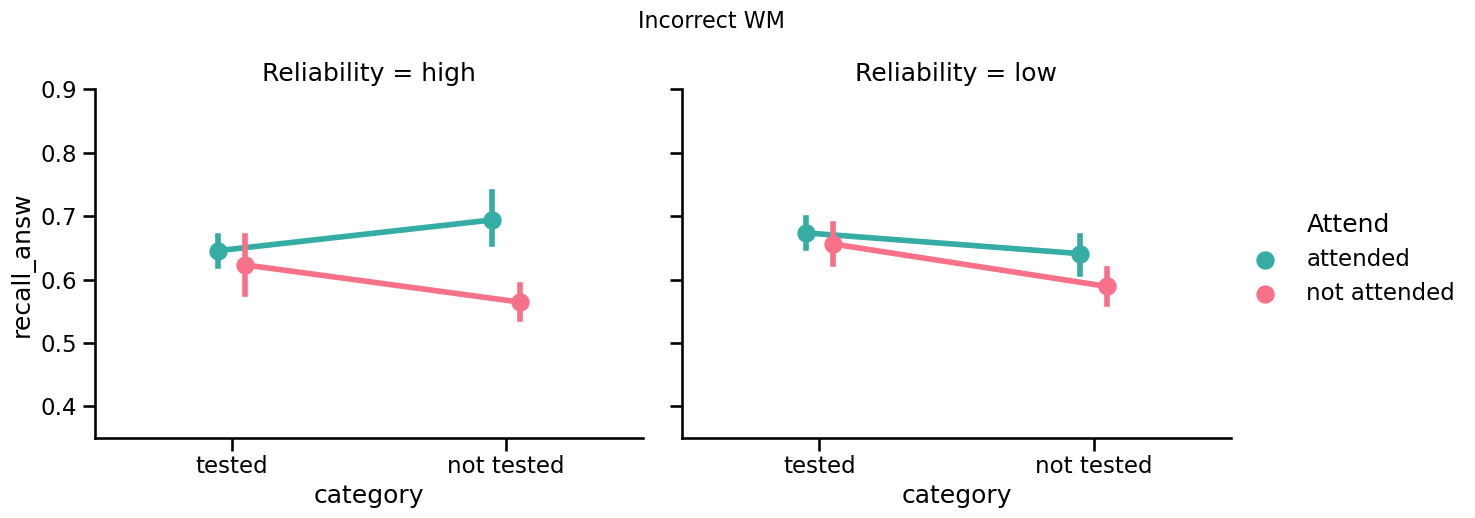

In [79]:
category_order = ['tested', 'not tested', 'foil', 'distractor']
df_filtered_incorrect_wm = df_incorrect_wm[df_incorrect_wm['category'].isin(['tested', 'not tested'])]

# Create the catplot
g = sns.catplot(
    x='category',
    y='recall_answ',
    ci=68,
    hue='Attend',
    col='Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=palette,  # Reverse the color order
    data=df_filtered_incorrect_wm,
    order=['tested', 'not tested']  # Ensure correct x-axis order
#     hue_order=tested_item_order  # Prioritize Tested Item categories
)

# Set y-axis limits
g.set(ylim=(0.35, 0.9))
g.fig.suptitle("Incorrect WM", y=1.05, fontsize=16)  # Adjust y for spacing

# Set y-axis label
g

In [80]:
df_correct_tested = df_correct_wm[
    ((df_correct_wm['category'] == 'tested')|(df_correct_wm['category'] == 'distractor'))
]

df_correct_untested = df_correct_wm[
    ((df_correct_wm['category'] == 'not tested')|(df_correct_wm['category'] == 'distractor'))

]

df_incorrect_tested = df_incorrect_wm[
    ((df_incorrect_wm['category'] == 'tested')|(df_incorrect_wm['category'] == 'distractor'))
]

df_incorrect_untested = df_incorrect_wm[
    ((df_incorrect_wm['category'] == 'not tested')|(df_incorrect_wm['category'] == 'distractor'))
]


In [81]:
df_correct_tested['Prioritized - Deprioritized V2 Distractor Similarity Ranges']

6         (-0.16, -0.098]
7        (-0.098, -0.042]
9             (0.1, 0.18]
13           (0.032, 0.1]
18       (-0.098, -0.042]
               ...       
25327     (-0.16, -0.098]
25340    (-0.098, -0.042]
25342     (-0.16, -0.098]
25348        (0.032, 0.1]
25352     (-0.16, -0.098]
Name: Prioritized - Deprioritized V2 Distractor Similarity Ranges, Length: 5845, dtype: category
Categories (5, interval[float64, right]): [(-0.16, -0.098] < (-0.098, -0.042] < (-0.042, 0.032] < (0.032, 0.1] < (0.1, 0.18]]

In [82]:
print(df_correct_tested['category'].unique())


['distractor' 'tested']


In [83]:
attend_palette = {
    'distractor': '#FFC0CB',  # Blue
    'not attended': '#90D5FF',  # Orange
    'attended': '#301934',  # Green
}

In [84]:
df_correct_tested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges,Prioritized - Deprioritized IT Distractor Similarity Squared Ranges,Tested - Untested V2 Distractor Similarity Ranges,Tested - Untested IT Distractor Similarity Ranges,Tested - Untested V2 Distractor Similarity Squared Ranges,Tested - Untested IT Distractor Similarity Squared Ranges,category,mem_stim_type,Attend,Reliability
6,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.0074, 0.021]","(-0.5, -0.31]","(-0.16, -0.1]","(0.25, 0.74]","(0.0074, 0.021]","(-0.51, -0.33]",distractor,distractor,distractor,high
7,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.31, -0.0014]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,low
9,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.00043, 0.0074]","(-0.31, -0.0014]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,low
13,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(0.58, 0.98]","(0.034, 0.098]","(0.74, 1.2]","(-0.008, -0.0046]","(0.61, 0.94]",distractor,distractor,distractor,low
18,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(-0.0014, 0.58]","(0.034, 0.098]","(-1.2, -0.74]","(-0.008, -0.0046]","(-0.025, 0.61]",tested,tested,not attended,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(0.58, 0.98]","(-0.16, -0.1]","(-1.2, -0.74]","(0.0074, 0.021]","(-0.025, 0.61]",distractor,distractor,distractor,high
25340,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.0046, 0.00043]","(0.58, 0.98]","(-0.1, -0.04]","(-1.2, -0.74]","(-0.0046, 0.0005]","(0.61, 0.94]",tested,tested,attended,high
25342,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(-0.0014, 0.58]","(-0.16, -0.1]","(-1.2, -0.74]","(0.0074, 0.021]","(-0.025, 0.61]",distractor,distractor,distractor,low
25348,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.01, -0.0079]","(-0.31, -0.0014]","(-0.04, 0.034]","(-0.74, -0.25]","(-0.01, -0.008]","(-0.33, -0.025]",tested,tested,not attended,high


In [85]:
df_correct_wm = df[df['mem_stim_type'] == 'distractor']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/1974137965.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


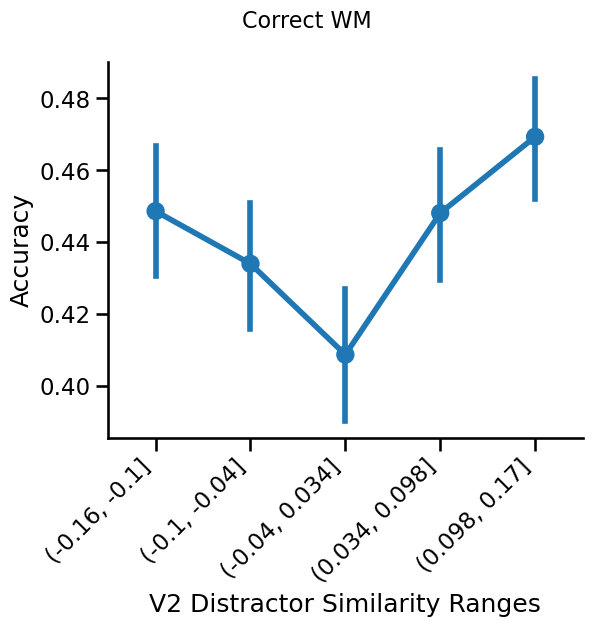

In [109]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
#     hue='Tested Item',
#     col='Reliability',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

# g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/3133259115.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


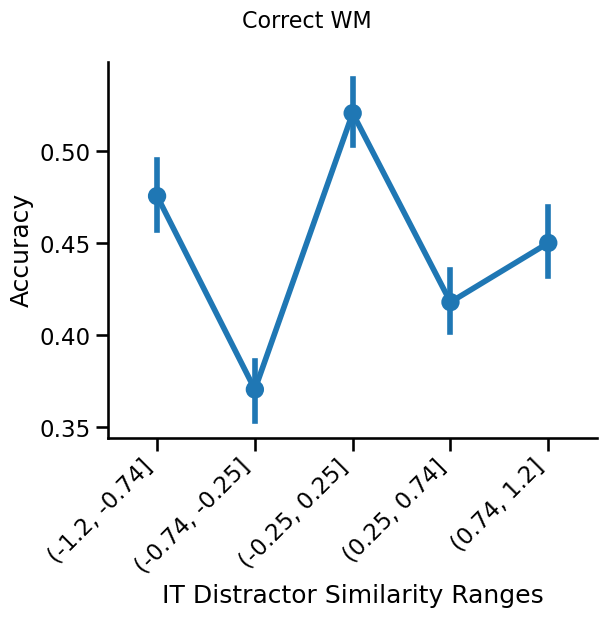

In [108]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
#     hue='Tested Item',
#     col='Reliability',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
#     palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

# g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/345497533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


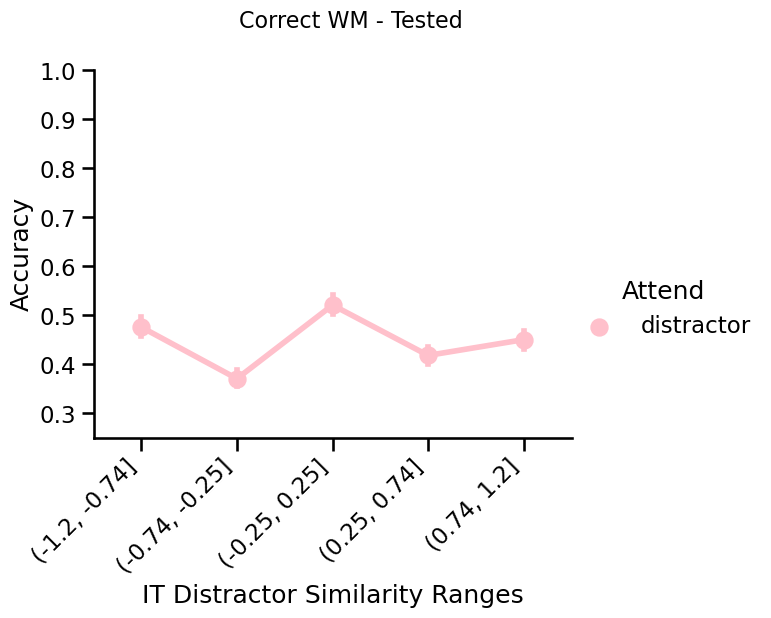

In [88]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('IT Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2943349932.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


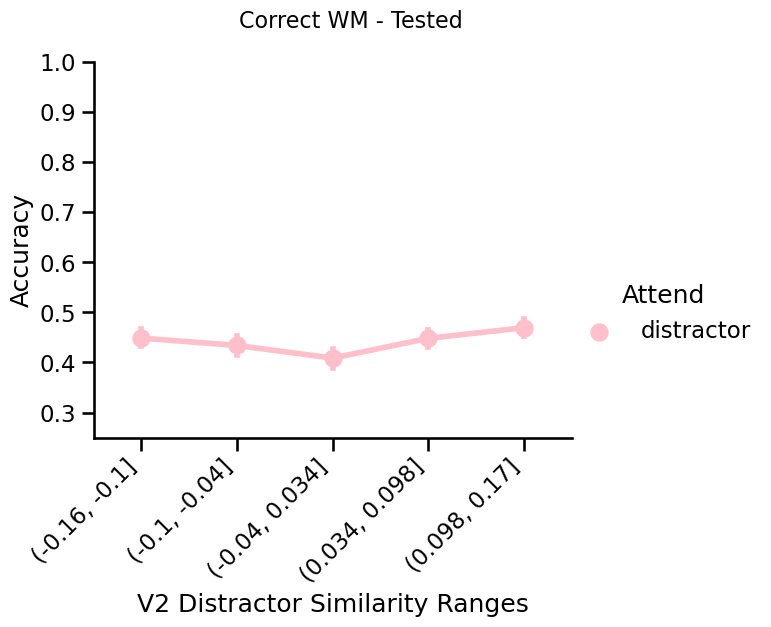

In [89]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col='Retrocue Reliability',
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_correct_wm,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [90]:
df['resp_correct_within'].min()

-0.2305140334279406

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/2898329028.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


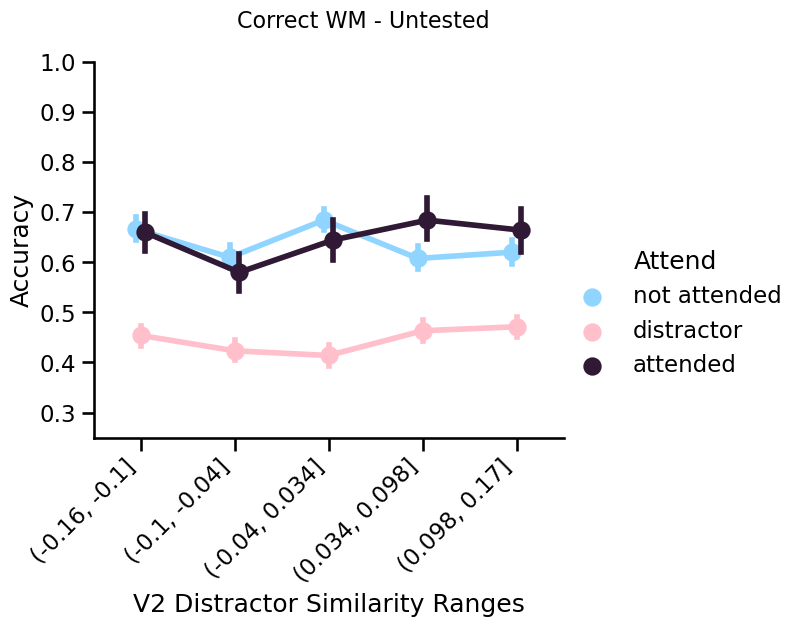

In [91]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
    dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_correct_untested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.25, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Correct WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()


In [92]:
# !pip install stargazer

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/3785683321.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


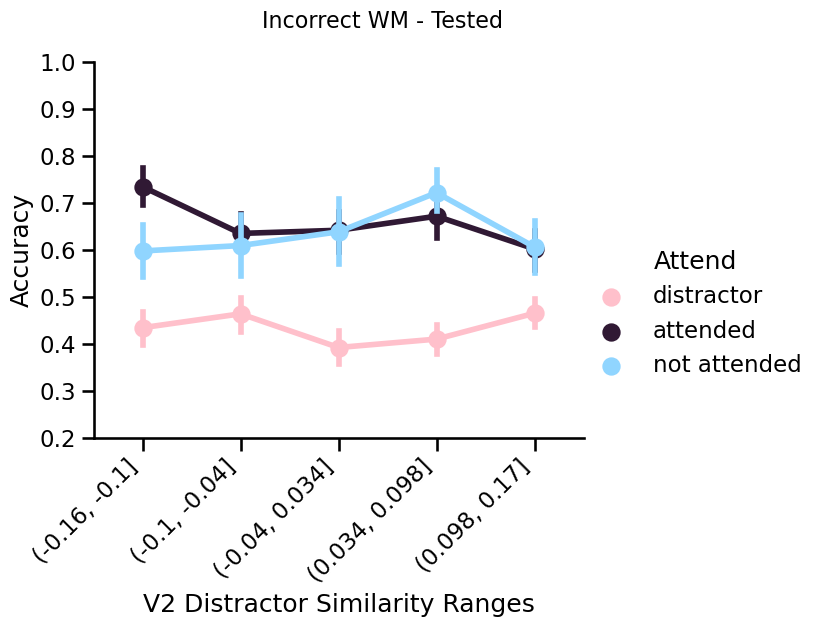

In [93]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_tested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Incorrect WM - Tested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

In [94]:
df_correct_tested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges,Prioritized - Deprioritized IT Distractor Similarity Squared Ranges,Tested - Untested V2 Distractor Similarity Ranges,Tested - Untested IT Distractor Similarity Ranges,Tested - Untested V2 Distractor Similarity Squared Ranges,Tested - Untested IT Distractor Similarity Squared Ranges,category,mem_stim_type,Attend,Reliability
6,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.0074, 0.021]","(-0.5, -0.31]","(-0.16, -0.1]","(0.25, 0.74]","(0.0074, 0.021]","(-0.51, -0.33]",distractor,distractor,distractor,high
7,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.31, -0.0014]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,low
9,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.00043, 0.0074]","(-0.31, -0.0014]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,low
13,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(0.58, 0.98]","(0.034, 0.098]","(0.74, 1.2]","(-0.008, -0.0046]","(0.61, 0.94]",distractor,distractor,distractor,low
18,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(-0.0014, 0.58]","(0.034, 0.098]","(-1.2, -0.74]","(-0.008, -0.0046]","(-0.025, 0.61]",tested,tested,not attended,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(0.58, 0.98]","(-0.16, -0.1]","(-1.2, -0.74]","(0.0074, 0.021]","(-0.025, 0.61]",distractor,distractor,distractor,high
25340,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.0046, 0.00043]","(0.58, 0.98]","(-0.1, -0.04]","(-1.2, -0.74]","(-0.0046, 0.0005]","(0.61, 0.94]",tested,tested,attended,high
25342,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(-0.0014, 0.58]","(-0.16, -0.1]","(-1.2, -0.74]","(0.0074, 0.021]","(-0.025, 0.61]",distractor,distractor,distractor,low
25348,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.01, -0.0079]","(-0.31, -0.0014]","(-0.04, 0.034]","(-0.74, -0.25]","(-0.01, -0.008]","(-0.33, -0.025]",tested,tested,not attended,high


In [95]:
df_incorrect_untested

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges,Prioritized - Deprioritized IT Distractor Similarity Squared Ranges,Tested - Untested V2 Distractor Similarity Ranges,Tested - Untested IT Distractor Similarity Ranges,Tested - Untested V2 Distractor Similarity Squared Ranges,Tested - Untested IT Distractor Similarity Squared Ranges,category,mem_stim_type,Attend,Reliability
14,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.01, -0.0079]","(-0.31, -0.0014]","(-0.04, 0.034]","(-0.74, -0.25]","(-0.01, -0.008]","(-0.33, -0.025]",distractor,distractor,distractor,high
31,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0079, -0.0046]","(-0.31, -0.0014]","(0.034, 0.098]","(0.25, 0.74]","(-0.008, -0.0046]","(-0.33, -0.025]",distractor,distractor,distractor,low
32,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.00043, 0.0074]","(-0.31, -0.0014]","(-0.16, -0.1]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.33, -0.025]",distractor,distractor,distractor,high
35,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.31, -0.0014]","(-0.1, -0.04]","(-0.74, -0.25]","(-0.008, -0.0046]","(-0.33, -0.025]",distractor,distractor,distractor,low
81,NaN,NaN,165862,2024-11-27 10:29:27.557,WM_Deepgen,2023.2.1,Win32,59.88024,NaN,NaN,...,"(0.0074, 0.021]","(-0.5, -0.31]","(-0.16, -0.1]","(0.25, 0.74]","(0.0074, 0.021]","(-0.51, -0.33]",not tested,not tested,not attended,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.00043, 0.0074]","(-0.0014, 0.58]","(-0.16, -0.1]","(-1.2, -0.74]","(0.0005, 0.0074]","(-0.025, 0.61]",distractor,distractor,distractor,low
25329,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(-0.0046, 0.00043]","(-0.56, -0.5]","(-0.1, -0.04]","(-0.25, 0.25]","(-0.0046, 0.0005]","(-0.56, -0.51]",distractor,distractor,distractor,high
25336,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.0074, 0.021]","(-0.5, -0.31]","(0.098, 0.17]","(0.25, 0.74]","(0.0074, 0.021]","(-0.51, -0.33]",distractor,distractor,distractor,low
25341,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,"(0.00043, 0.0074]","(-0.5, -0.31]","(0.098, 0.17]","(-0.74, -0.25]","(0.0005, 0.0074]","(-0.51, -0.33]",distractor,distractor,distractor,low


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_80413/729793129.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


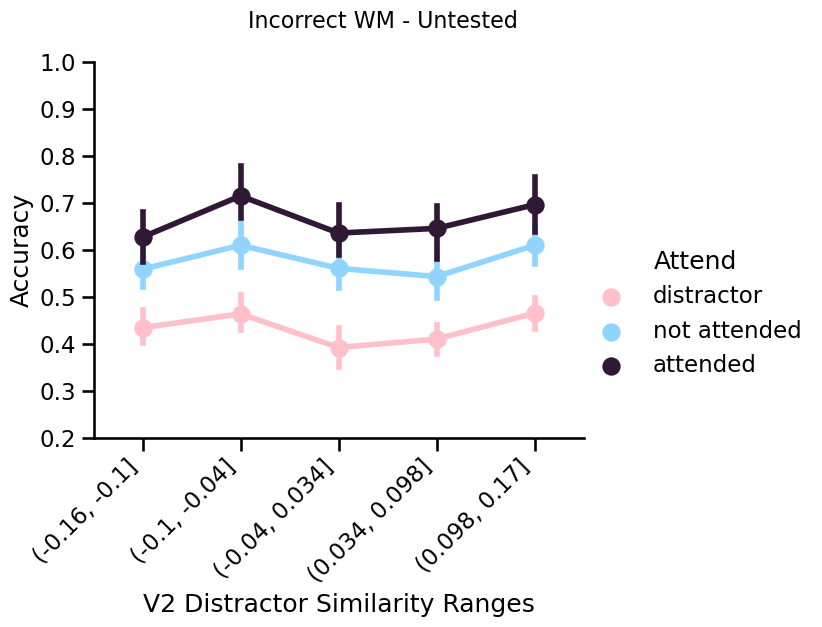

In [96]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='recall_answ',
    ci=68,
    hue='Attend',
#     col='Reliability',
#     col_order=['low', 'high'],
    
    aspect=1.3,
#     dodge=0.1,
    kind='point',
    palette=attend_palette,  # Reverse the color order
    data=df_incorrect_untested,
#     order=category_order,
#     hue_order=tested_item_order  # Prioritize Tested Item categories
    # Set the order of x-axis categories
)

g.set(ylim=(0.2, 1))
g.set_ylabels('Accuracy')
g.set_xlabels('V2 Distractor Similarity Ranges')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the angle and alignment of the labels

# Add a title
g.fig.suptitle("Incorrect WM - Untested", y=1.05, fontsize=16)  # Adjust y for spacing

plt.show()

In [97]:
df_correct_wm['category']

6        distractor
7        distractor
9        distractor
13       distractor
14       distractor
            ...    
25329    distractor
25336    distractor
25341    distractor
25342    distractor
25347    distractor
Name: category, Length: 3880, dtype: object

In [98]:
!pip install rpy2


  Using cached rpy2-3.5.17.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [36 lines of output]
      cffi mode is CFFI_MODE.ANY
      rpy2/_rinterface_cffi_build.py:275: UserWarning: dlopen(/private/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/pip-build-env-6j5qri26/overlay/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so, 0x0002): tried: '/private/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/pip-build-env-6j5qri26/overlay/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/pip-build-env-6j5qri26/overlay/lib/python3.8/site-packages/_cffi_backend.cpython-38-darwin.so' (no such file), '/

In [99]:

model = smf.glm(
    formula="recall_answ ~ resp_correct + category * validity_binary * reliability_binary * it_sim_dis_diff_z * v2_sim_dis_diff_z",
    data=df_correct_wm,
    family=sm.families.Binomial()  # Binary outcomes
)


### here recall_answ = 1 if ltm task correct, 0 if its wrong
### resp_correct = 1 if wm correct
### category : tested, not tested, distractor, foil?

results = model.fit()

print(results)

In [100]:

print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            recall_answ   No. Observations:                 3880
Model:                            GLM   Df Residuals:                     3863
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.1
Date:                Thu, 23 Jan 2025   Deviance:                       5302.3
Time:                        11:37:37   Pearson chi2:                 3.88e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.006461
Covariance Type:            nonrobust                                         
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [101]:
df_correct_wm_no_dist = df_correct_wm[
    (df_correct_wm['category'] != 'distractor')
]

df_incorrect_wm_no_dist = df_incorrect_wm[
    (df_incorrect_wm['category'] != 'distractor')
]


In [102]:
df_correct_wm_no_dist['Attend']

Series([], Name: Attend, dtype: object)

In [103]:

df_correct_wm_no_dist['attend_binary'] = np.where(df_correct_wm_no_dist['Attend'] == 'attended', -1 , 1)


In [104]:
df_correct_wm_no_dist['attend_binary'] 

Series([], Name: attend_binary, dtype: int64)

In [105]:
### include if the ltm item that is in wm correct dataframe was tested or not in the wm

## tested vs untested in wm wrt to the wm item

In [106]:
# df_correct_wm_no_dist['test']

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_correct_wm_no_dist['reliability_binary_z'] = scaler.fit_transform(df_correct_wm_no_dist[['reliability_binary']])
df_correct_wm_no_dist['attend_binary_z'] = scaler.fit_transform(df_correct_wm_no_dist[['attend_binary']])



ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by StandardScaler.

In [ ]:
df_correct_wm_no_dist['mem_stim_type'] = np.where(df_correct_wm_no_dist['mem_stim_type'] == 'tested', -1 , 1)

df_correct_wm_no_dist['mem_stim_type_z'] = scaler.fit_transform(df_correct_wm_no_dist[['mem_stim_type']])


In [ ]:
# df_correct_wm_no_dist.to_csv('pilot5_stats/correct_wm_ltm.csv', index=False)


In [ ]:
# df_incorrect_wm.to_csv('pilot5_stats/incorrect_wm_ltm.csv', index=False)


In [ ]:
df_correct_wm

In [ ]:
df_incorrect_wm

In [ ]:
df_wm = pd.concat([df_correct_wm, df_incorrect_wm], axis=0)
df_wm

In [ ]:
df_wm_no_dist = df_wm[
    (df_wm['category'] != 'distractor')
]


In [ ]:
# df_wm_no_dist.to_csv('pilot5_stats/wm_ltm_no_dist.csv')

In [ ]:
# sub_df_valid = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['img1'] == row['ImagePath'])), axis=1)]
df_valid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))
]

df_valid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1'))
]

df_invalid_attend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))
]

df_invalid_unattend = df[
    ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2'))|
    ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
]

In [ ]:
# df_attended = pd.concat([df_valid_attend, df_invalid_attend], ignore_index=True)


In [ ]:
## wm accuracy by priority and tested item

##is being tested before showing any effect
## also split by correct and incorrect trials from wm task

In [ ]:
### first categoriaze by wm task if they were correct or incorrect


### then memory for tested and untested items as a function of wherer they were prioritized or deprioritized

In [ ]:
# df

In [ ]:
# df['category_wm_ltm'] = 

In [ ]:
# df_correct_wm = df[
#     ((df['resp_correct'] == 1)) ]


In [ ]:
# df_incorrect_wm = df[
#     ((df['resp_correct'] == 0)) ]


In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_correct_wm)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Correct WM", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
##tested/untested and distractor and then split up by prioritized and deprioritized

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Deprioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# import numpy as np

# # Define the conditions for each case
# conditions = [
#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'valid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'valid') & (df['attend'] == 'img1')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')),

#     ((df['ImagePath'] == df['img1']) & (df['validity'] == 'invalid') & (df['attend'] == 'img2')) |
#     ((df['ImagePath'] == df['img2']) & (df['validity'] == 'invalid') & (df['attend'] == 'img1'))
# ]

# # Define the assignments for each case
# assignments = [
#     # Condition 1: Valid and attended image is the same
#     {
#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 2: Valid but attended image is not the same, flipping certain fields
#     { 
# #         flip retrocue
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     },
#     # Condition 3: Invalid and attended image is the same
#     {
#         'seen_img': 'not tested',
#         'IT_to_seen_image': df['it_sim_dis_attend'],
#         'V2_to_seen_image': df['v2_sim_dis_attend'],
#         'IT_relative': df['Prioritized - Deprioritized IT Distractor Similarity Ranges'],
#         'V2_relative': df['Prioritized - Deprioritized V2 Distractor Similarity Ranges']
#     },
#     # Condition 4: Invalid and attended image is not the same
#     {#         flip retrocue

#         'seen_img': 'tested',
#         'IT_to_seen_image': df['it_sim_dis_unattend'],
#         'V2_to_seen_image': df['v2_sim_dis_unattend'],
#         'IT_relative': np.where(df['attend'] == 'img2', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1']),
#         'V2_relative': np.where(df['attend'] == 'img2', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])
#     }
# ]

# # Apply each condition to assign values
# for column, values in assignments[0].items():
#     df[column] = np.select(conditions, [assignment[column] for assignment in assignments], default=np.nan)

# # # Additional derived columns
# # df['it_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['IT_root_im1'] - df['IT_root_im2'], df['IT_root_im2'] - df['IT_root_im1'])
# # df['v2_sim_dis_diff'] = np.where(df['attend'] == 'img1', df['V2_root_im1'] - df['V2_root_im2'], df['V2_root_im2'] - df['V2_root_im1'])

# # Normalize 'it_sim_dis_diff'
# df['it_sim_dis_diff'] = df['it_sim_dis_diff'] - df['it_sim_dis_diff'].mean(skipna=True)


In [ ]:
# df['it_sim_dis_unattend']

In [ ]:
# g = sns.catplot(
#             x = 'IT_relative',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df_attended)

# g.set(ylim=(0.55, 0.85))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Seen and Attended images", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# sub_df = df[df.apply(lambda row: any((df['participant'] == row['participant']) & (df['ping_img'] == row['ImagePath'])), axis=1)]

# Display the resulting sub_df to the user
# tools.display_dataframe_to_user(name="Sub DF where ImagePath equals ping_im", dataframe=sub_df)


In [ ]:
# sub_df

In [ ]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Prioritized Item',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized V2 Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# g = sns.catplot(
#             x = 'Prioritized - Deprioritized IT Distractor Similarity Ranges',
#             y = 'recall_answ',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.1,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = sub_df)

# g.set(ylim=(0, 1))
# g.set_ylabels('Accuracy')

# # Add a title
# g.fig.suptitle("Distractor images seen", y=1.05, fontsize=16)  # Adjust y for spacing

# plt.show()

In [ ]:
# recalled_images = df[df['acc_recall'] == 1]

# def check_image_presence(row):
#     image_path = row['ImagePath']
#     participant = row['participant']
    
#     # Filter the original DataFrame for the same participant
#     participant_images = df[df['participant'] == participant]
#     if image_path in participant_images['ping_img'].values:
#             return True
# #     return is_present

# # Step 3: Apply the function and create a new column
# recalled_images.apply(check_image_presence, axis=1)

# # # Display the filtered DataFrame
# # print(recalled_images[['ImagePath', 'participant', 'image_present']==True])


In [ ]:

# # Create a mapping for the answers
# answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
#                   3: 'Probably seen', 4: 'Definitely seen'}



# combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)

# # Plotting the distribution of answer labels for each participant
# plt.figure(figsize=(15, 8))
# sns.countplot(data=combined_df, x='participant', hue='Answer Labels', palette='viridis')
# plt.title('Distribution of Answers by Participant')
# plt.xlabel('Participant ID')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
# plt.legend(title='Answer Labels', bbox_to_anchor=(1, 1))  # Move the legend out of the plot
# plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
# plt.show()

In [ ]:
# new_data = combined_df

In [ ]:
# new_data['image_seen'] = new_data['acc_recall']

# recall_response_column = 'image_recall_response.keys'

# new_data['recall_response'] = new_data[recall_response_column].map({1: 'not remembered', 2: 'not remembered', 3: 'remembered', 4: 'remembered'})
# recall_bias = new_data['recall_response'].value_counts(normalize=True)

# # 1. Overall recall response distribution
# recall_dist = new_data['recall_response'].value_counts()

# # Ensure 'image_seen' is boolean
# new_data['image_seen'] = new_data['acc_recall'].astype(bool)

# # Handle NaN values in 'recall_response'
# new_data['recall_response'] = new_data['recall_response'].fillna('unknown')
# accuracy_dist = new_data['image_seen'].value_counts()

# # Calculate recall response distribution for seen and not seen images
# seen_recall_dist = new_data[new_data['image_seen']]['recall_response'].value_counts()
# not_seen_recall_dist = new_data[~new_data['image_seen']]['recall_response'].value_counts()

# seen_recall_dist = seen_recall_dist[seen_recall_dist.index != 'unknown']
# not_seen_recall_dist = not_seen_recall_dist[not_seen_recall_dist.index != 'unknown']

# # Print the distributions for verification
# print("Recall Response Distribution for Seen Images:")
# print(seen_recall_dist)

# print("\nRecall Response Distribution for Not Seen Images:")
# print(not_seen_recall_dist)

# plt.figure(figsize=(12, 6))
# plt.figure(figsize=(18, 6)) 

# # Accuracy of Recall Plot
# plt.subplot(1, 3, 1)
# sns.barplot(x=accuracy_dist.index, y=accuracy_dist.values)
# plt.title('Accuracy of Recall', fontsize=14)  # Set title font size
# plt.xlabel('Is Recall Correct', fontsize=12)   # Set x-label font size
# plt.ylabel('Count', fontsize=12)              # Set y-label font size

# # Recall Bias Plot
# plt.subplot(1, 3, 2)
# sns.barplot(x=recall_bias.index, y=recall_bias.values)
# plt.title('Recall Bias', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Proportion', fontsize=12)

# # Recall Response Distribution for Seen and Not Seen Images
# #  seen_recall_dist and not_seen_recall_dist are already calculated
# plt.subplot(1, 3, 3)
# sns.barplot(x=seen_recall_dist.index, y=seen_recall_dist.values)
# plt.title('Recall Response for Seen Images', fontsize=14)
# plt.xlabel('Recall Response', fontsize=12)
# plt.ylabel('Count', fontsize=12)

# plt.tight_layout() 
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 5))
# recall_dist.plot(kind='bar', color='lightblue')
# plt.title('Overall Recall Response Distribution')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate x labels if necessary
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 5))

# # Subplot for seen images
# plt.subplot(1, 2, 1)
# seen_recall_dist.plot(kind='bar', color='lightgreen')
# plt.title('Recall Response Distribution for Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# # Subplot for not seen images
# plt.subplot(1, 2, 2)
# not_seen_recall_dist.plot(kind='bar', color='salmon')
# plt.title('Recall Response Distribution for Not Seen Images')
# plt.xlabel('Recall Response')
# plt.ylabel('Count')
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()